In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

import os
from pandas import DataFrame
import pandas as pd
from notebook_utils import NotebookUtilities
import matplotlib.pyplot as plt
import re
import humanize
from datetime import timedelta

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(832366, 109)



# Time To Hemorrhage Control


Is hemorrhage control merely applying a tourniquet? Is it also applying a packing gauze (but not applying a dressing gauze)? Does a gaze count as engagement with the patient?

In [4]:

# Investigate the presence of hemorrhage control more broadly
# Define a function to check if a string contains the words "tourniquet" or "woundpack"
fn = lambda x: ('tourniquet' in str(x).lower()) or ('woundpack' in str(x).lower())

# Apply the lambda function to each element of the data frame, ignoring NaN values, and sum the results
srs = frvrs_logs_df.applymap(fn, na_action='ignore').sum()

# Create a list of column names with non-zero sums (indicating the presence of 'tourniquet' or 'woundpack')
columns_list = srs[srs != 0].index.tolist()

# Print the list of columns with non-zero sums
print(columns_list)

# Create a mask to filter rows where 'woundpack' is present in the 'voice_capture_message' column
mask_series = frvrs_logs_df.voice_capture_message.map(lambda x: ('woundpack' in str(x).lower()))

# Check if there are rows that meet the condition and print unique values of 'voice_capture_message'
if frvrs_logs_df[mask_series].shape[0]: print(frvrs_logs_df[mask_series].voice_capture_message.unique().tolist())

# Create a mask to filter rows where 'woundpack' is present in the 'voice_command_command_description' column
mask_series = frvrs_logs_df.voice_command_command_description.map(lambda x: ('woundpack' in str(x).lower()))

# Check if there are rows that meet the condition and print unique values of 'voice_command_command_description'
if frvrs_logs_df[mask_series].shape[0]: print(frvrs_logs_df[mask_series].voice_command_command_description.unique().tolist())

# Iterate through the columns with non-zero sums
for cn in columns_list:

    # Print the column name
    print(cn)
    
    # Create a mask to only include rows where the column contains the word "tourniquet" or "woundpack"
    mask_series = frvrs_logs_df[cn].map(fn)
    
    # Create a data frame with rows that meet the condition
    df = frvrs_logs_df[mask_series]
    
    # Display a sample of the data frame, dropping columns with all NaN values and transposing it
    display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

['voice_capture_message', 'voice_command_command_description', 'injury_record_required_procedure', 'tool_hover_type', 'tool_selected_type', 'injury_treated_required_procedure', 'tool_applied_type', 'tool_applied_data', 'tool_applied_sender', 'tool_discarded_type']
voice_capture_message


,333258,32194,72671,203093
action_type,VOICE_CAPTURE,VOICE_CAPTURE,VOICE_CAPTURE,VOICE_CAPTURE
elapsed_time,170910,193893,148941,243776
event_time,2022-03-16 09:20:44,2023-03-14 11:39:57,2023-04-19 11:20:13,2023-08-09 12:15:29
session_uuid,67ed9702-0908-454a-8069-7ca4a6f2bee9,13839608-6085-4a88-a8f2-74af9fd06a05,1df10bfd-0f85-42ff-a873-36dfe05df77b,dfa09c43-42f4-4cb5-8f74-381744e0d320
file_name,Disaster Day 2022/MB_0927.csv,All CSV files renamed by date/03.14.23.1154.csv,All CSV files renamed by date/04.19.23.1130.csv,DCEMS Round 2 only triage sessions/dfa09c43-42...
logger_version,1.3,1.3,1.3,1.0
time_group,1,1,2,1
voice_capture_message,tourniquet what is this needle OK,yep sir we're gonna get you some help so i see...,gotta pause he needs a tourniquet,still bleeding tourniquet you
voice_capture_command_description,NA,NA,NA,NaN


voice_command_command_description


,206759,185368,86548,1402
action_type,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND,VOICE_COMMAND
elapsed_time,99978,89162,235983,347238
event_time,2023-08-03 08:59:13,2023-08-03 10:08:49,2023-04-20 09:15:46,2023-03-10 08:36:45
session_uuid,f2eb6809-d49f-4c3e-be62-91f1538ed437,84f8db6a-1993-493f-b6cb-609ac3b45107,f33f702d-4b79-43d9-b980-42dc10c2b882,40efaf29-70b3-435a-8847-bcd4235720be
file_name,DCEMS Round 2 only triage sessions/f2eb6809-d4...,DCEMS Round 2 only triage sessions/84f8db6a-19...,All CSV files renamed by date/04.20.23.0924.csv,All CSV files renamed by date/03.10.23.0831.csv
logger_version,1.0,1.0,1.3,1.3
time_group,1,1,1,1
voice_command_message,stand up,anywhere else,are you hurt,are you hurt
voice_command_command_description,yeah I know what you got Yep you need some imm...,tourniquet have any other injuries,so remember with the with tourniquets if it's ...,and extremity injuries like don't don't try to...


injury_record_required_procedure


,137395,746657,815488,697131
action_type,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD,INJURY_RECORD
elapsed_time,115909,284896,204353,27824
event_time,2022-12-01 15:47:31,2023-05-10 09:21:00,2023-04-21 11:57:00,2023-03-08 13:43:00
session_uuid,91a84c6a-ba27-4116-8644-e5373b3588de,7b239b94-a052-4a1f-929c-123a94426327,efed5e1c-4427-47df-8e3f-9e4714880169,845d87c5-7b8b-4bf3-bfc6-91c74e285243
file_name,All CSV files renamed by date/12.01.22.1551.csv,v.1.0/clean-7b239b94-a052-4a1f-929c-123a944263...,v.1.0/clean-max17.csv,v.1.0/Clean 845d87c5-7b8b-4bf3-bfc6-91c74e2852...
logger_version,1.3,1.0,1.0,1.0
time_group,1,2,2,1
injury_record_id,L Wrist Amputation,R Shin Amputation,R Side Puncture,L Stomach Puncture
injury_record_patient_id,Lily_7 Root,Lily_2 Root,Mike_5 Root,Bob_0 Root
injury_record_required_procedure,tourniquet,tourniquet,woundpack,woundpack


tool_hover_type


,120910,806016,220928,830463
action_type,TOOL_HOVER,TOOL_HOVER,TOOL_HOVER,TOOL_HOVER
elapsed_time,614020,100874,311155,218165
event_time,2023-04-25 13:52:29,2023-04-21 09:42:00,2023-07-26 12:25:52,2023-09-11 14:20:50
session_uuid,eecb1d19-1d05-4725-9289-eb02d601cdf3,f68ce2b4-67dc-4829-89fc-cfe478391148,18bfbc11-3c60-4c89-94cc-ac8fea028318,a3d6d913-7755-4e8d-a174-d5e491c4eac7
file_name,All CSV files renamed by date/04.25.23.1342.csv,v.1.0/clean-max11.csv,DCEMS Round 2 only triage sessions/Kali S..csv,v.1.3/a3d6d913-7755-4e8d-a174-d5e491c4eac7.csv
logger_version,1.0,1.0,1.0,1.3
time_group,2,1,1,1
tool_hover_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_hover_count,998,999,996,999


tool_selected_type


,740667,727856,822288,90745
action_type,TOOL_SELECTED,TOOL_SELECTED,TOOL_SELECTED,TOOL_SELECTED
elapsed_time,456668,375733,840171,697404
event_time,2023-06-07 10:17:00,2023-05-31 09:21:00,2023-04-21 08:32:00,2023-04-20 11:00:47
session_uuid,51f8d40c-9550-4ef1-a71c-e030c0a08f29,14a344df-eee2-4fd1-b182-e3cdacd9026c,ee42b183-00b2-4bb9-89b9-0b38b73e69eb,04acc8f2-1e64-47b2-9606-8d661f584aec
file_name,v.1.0/clean-51f8d40c-9550-4ef1-a71c-e030c0a08f...,v.1.0/clean-14a344df-eee2-4fd1-b182-e3cdacd902...,v.1.0/clean-max8.csv,All CSV files renamed by date/04.20.23.1106.csv
logger_version,1.0,1.0,1.0,1.3
time_group,2,2,2,2
tool_selected_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_selected_count,995,997,995,997


injury_treated_required_procedure


,754861,176864,760508,719629
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED,INJURY_TREATED
elapsed_time,450058,214313,260861,475946
event_time,2023-05-11 10:39:00,2023-08-09 12:36:38,2023-05-09 08:57:00,2023-03-03 11:43:00
session_uuid,8581c1f8-a4e8-4245-ac73-2bd671237001,44458d4a-3cce-4907-85e3-3db1375ce6bb,8f6097ce-795d-483a-a811-e6a5423bc59d,5dce5abe-7ded-46e7-8d07-b2e2cd76ef55
file_name,v.1.0/clean-8581c1f8-a4e8-4245-ac73-2bd6712370...,DCEMS Round 2 only triage sessions/44458d4a-3c...,v.1.0/clean-8f6097ce-795d-483a-a811-e6a5423bc5...,v.1.0/Clean Marty5.csv
logger_version,1.0,1.0,1.0,1.0
time_group,2,1,1,2
injury_treated_id,L Thigh Puncture,R Thigh Laceration,L Shoulder Puncture,R Thigh Laceration
injury_treated_patient_id,Mike_7 Root,Mike_5 Root,Mike_2 Root,Mike_5 Root
injury_treated_required_procedure,tourniquet,tourniquet,woundpack,tourniquet


tool_applied_type


,802291,164187,113461,203511
action_type,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED
elapsed_time,454731,203471,783713,154222
event_time,2023-05-31 08:52:00,2023-08-02 08:24:54,2023-04-25 10:44:38,2023-08-01 12:21:08
session_uuid,f80ef1e8-e0d1-4106-9f18-4024ff911e22,0b01cf49-87cc-4647-9f29-b8dff39dcd6c,84282ed0-0e63-44e0-8b39-5156e3c868d0,e4b17764-a999-4733-b455-1968588effc8
file_name,v.1.0/clean-f80ef1e8-e0d1-4106-9f18-4024ff911e...,DCEMS Round 2 only triage sessions/0b01cf49-87...,All CSV files renamed by date/04.25.23.1031.csv,DCEMS Round 2 only triage sessions/e4b17764-a9...
logger_version,1.0,1.0,1.3,1.0
time_group,2,1,2,1
tool_applied_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_applied_attachment_point,LeftUpLeg (UnityEngine.GameObject),RightUpLeg (UnityEngine.GameObject),RightLeg (UnityEngine.GameObject),LeftUpLeg (UnityEngine.GameObject)
tool_applied_tool_location,tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject)


tool_applied_data


,229647,791127,86257,707571
action_type,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED
elapsed_time,599245,461755,505729,715635
event_time,2022-03-15 11:41:02,2023-05-09 09:50:00,2023-04-20 09:07:12,2023-03-07 11:41:00
session_uuid,677d1c18-f292-4bcb-924d-52f5e762533f,d347b967-5e20-4527-95dd-3a0fdf73af1d,60d2041e-9b37-4c13-a73d-906e6ecebd01,524d5418-62f4-4834-9f1e-47202c30e667
file_name,Disaster Day 2022/AD_1154.csv,v.1.0/clean-d347b967-5e20-4527-95dd-3a0fdf73af...,All CSV files renamed by date/04.20.23.0908.csv,v.1.0/Clean Marty16.csv
logger_version,1.3,1.0,1.3,1.0
time_group,2,2,2,2
tool_applied_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_applied_attachment_point,RightUpLeg (UnityEngine.GameObject),RightUpLeg (UnityEngine.GameObject),RightUpLeg (UnityEngine.GameObject),RightUpLeg (UnityEngine.GameObject)
tool_applied_tool_location,tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject)


tool_applied_sender


,214764,668422,777773,836380
action_type,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED,TOOL_APPLIED
elapsed_time,843091,315665,3286428,125855
event_time,2023-07-27 11:14:58,2022-03-16 10:52:59,2023-06-12 15:24:00,2023-09-11 13:04:53
session_uuid,401ce554-b556-4a10-88bb-424ed5c22ea8,1044049f-c7e0-4a16-98d3-e3826b4b8bfc,a0987257-801e-44c5-a1ad-81e0083bfa46,d0f826d3-a6db-4a6a-9ceb-5e17e3ff3d17
file_name,DCEMS Round 2 only triage sessions/Heather M.csv,Disaster Day 2022/ZG_1056.csv,v.1.0/clean-a0987257-801e-44c5-a1ad-81e0083bfa...,v.1.3/d0f826d3-a6db-4a6a-9ceb-5e17e3ff3d17.csv
logger_version,1.3,1.0,1.0,1.3
time_group,2,1,8,1
tool_applied_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_applied_attachment_point,RightUpLeg (UnityEngine.GameObject),LeftUpLeg (UnityEngine.GameObject),RightUpLeg (UnityEngine.GameObject),LeftUpLeg (UnityEngine.GameObject)
tool_applied_tool_location,tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject),tor_ring (1) (UnityEngine.GameObject)


tool_discarded_type


,150040,538541,722123,202837
action_type,TOOL_DISCARDED,TOOL_DISCARDED,TOOL_DISCARDED,TOOL_DISCARDED
elapsed_time,73720,457952,765858,96675
event_time,2022-12-07 12:42:59,2022-03-15 14:53:44,2023-03-03 12:26:00,2023-08-09 12:13:02
session_uuid,331f875e-eba1-4033-a502-6a888aee4e9c,38b995b3-fb77-4fda-b0b4-21f062ed6a38,206da802-d38f-4f3a-98e3-44f99481479d,dfa09c43-42f4-4cb5-8f74-381744e0d320
file_name,All CSV files renamed by date/12.07.22.1249.csv,Disaster Day 2022/PP_259.csv,v.1.0/Clean Marty7.csv,DCEMS Round 2 only triage sessions/dfa09c43-42...
logger_version,1.0,1.0,1.0,1.0
time_group,1,1,2,1
tool_discarded_type,Tourniquet,Tourniquet,Tourniquet,Tourniquet
tool_discarded_count,997,997,996,998
tool_discarded_location,"(0.7, 0.2, 0.6)","(2.9, 0.4, 2.1)","(3.4, 0.6, 2.5)","(1.2, 0.4, 0.7)"


In [5]:

# Create a list of column names that end with '_required_procedure'
required_columns_list = [cn for cn in frvrs_logs_df.columns if cn.endswith('_required_procedure')]

# Create a mask series that is True for rows where the value of any of the required columns is 'tourniquet' or 'woundpack'
mask_series = False
for cn in required_columns_list: mask_series |= (frvrs_logs_df[cn].isin(['tourniquet', 'woundpack']))

# Apply the mask to the frvrs_logs_df to filter rows based on the condition
df = frvrs_logs_df[mask_series]

# Display a sample of the data frame, dropping columns with all NaN values and transposing it
display(df.sample(min(4, df.shape[0])).dropna(axis='columns', how='all').T)

,620113,177109,680984,778603
action_type,INJURY_TREATED,INJURY_TREATED,INJURY_RECORD,INJURY_TREATED
elapsed_time,245954,382925,340992,390300
event_time,2022-03-15 10:56:47,2023-08-09 12:39:27,2023-05-12 16:55:00,2023-06-23 10:18:00
session_uuid,c82e4612-4e6f-4834-bc7f-6092327c44fa,44458d4a-3cce-4907-85e3-3db1375ce6bb,0b891add-e0c3-463d-948d-7f491f1d10ef,a118a19a-0126-48ea-9d7b-7762f8e99926
file_name,Disaster Day 2022/SB_1100.csv,DCEMS Round 2 only triage sessions/44458d4a-3c...,v.1.0/Clean 0b891add-e0c3-463d-948d-7f491f1d10...,v.1.0/clean-a118a19a-0126-48ea-9d7b-7762f8e999...
logger_version,1.3,1.0,1.0,1.0
time_group,2,1,2,2
injury_record_id,NaN,NaN,L Thigh Laceration,NaN
injury_record_patient_id,NaN,NaN,Mike_1 Root,NaN
injury_record_required_procedure,NaN,NaN,tourniquet,NaN


In [25]:

# Estimating the time to hemorrhage control
if nu.pickle_exists('notice_to_control_time_df'):
    notice_to_control_time_df = nu.load_object('notice_to_control_time_df')
else:
    
    # Create a mask to filter rows where 'injury_treated_required_procedure' is 'tourniquet' or 'woundpack'
    mask_series = frvrs_logs_df.injury_treated_required_procedure.isin(['tourniquet', 'woundpack'])
    
    # Define columns for grouping
    groupby_columns = ['session_uuid', 'time_group', 'patient_id']
    
    # Group the DataFrame based on the defined columns and filter by the mask
    gb = frvrs_logs_df[mask_series].sort_values(['elapsed_time']).groupby(groupby_columns)
    
    # Define lists of action types and command messages
    action_types_list = [
        'TELEPORT', 'S_A_L_T_WALK_IF_CAN', 'S_A_L_T_WAVE_IF_CAN', 'PATIENT_ENGAGED', 'PULSE_TAKEN', 'BAG_ACCESS',
        'TOOL_HOVER', 'TOOL_SELECTED', 'INJURY_TREATED', 'TOOL_APPLIED', 'TAG_SELECTED', 'TAG_APPLIED',
        'BAG_CLOSED', 'TAG_DISCARDED', 'TOOL_DISCARDED'
    ]
    command_messages_list = [
        'walk to the safe area', 'wave if you can', 'are you hurt', 'reveal injury', 'lay down', 'where are you',
        'can you hear', 'anywhere else', 'what is your name', 'hold still', 'sit up/down', 'stand up'
    ]
    
    # Create an empty list to store the row dictionaries
    rows_list = []
    
    # Iterate over the groupby object
    for (session_uuid, time_group, patient_id), df1 in gb:
    
        # Create a dictionary to store the row data
        row_dict = {}
    
        # Get the logger version
        logger_version = df1.logger_version.unique().item()
        row_dict['logger_version'] = logger_version
    
        # Add the groupby columns to the row dictionary
        for cn in groupby_columns: row_dict[cn] = eval(cn)
        
    
        # Get the first time to hemorrhage control
        first_control = df1.elapsed_time.min()
        row_dict['first_control'] = first_control
    
        # Get the patient's entire history and first notice
        mask_series = True
        for cn in groupby_columns: mask_series &= (frvrs_logs_df[cn] == eval(cn))
        df2 = frvrs_logs_df[mask_series]
        first_notice = df2.elapsed_time.min()
        row_dict['first_notice'] = first_notice
        
        # Get the body region info
        mask_series = ~df2.injury_treated_body_region.isnull()
        if df2[mask_series].shape[0]:
            injury_treated_body_region = df2[mask_series].injury_treated_body_region.squeeze()
            row_dict['injury_treated_body_region'] = injury_treated_body_region
    
        # Calculate the time from notice to control
        row_dict['notice_to_control_time'] = first_control - first_notice
    
        # Get the first action with the patient
        mask_series = (df2.action_type.isin(action_types_list))
        mask_series |= (
            (df2.action_type == 'VOICE_COMMAND') & (df2.voice_command_message.isin(command_messages_list))
        )
        first_action = df2[mask_series].elapsed_time.min()
        row_dict['first_action'] = first_action
    
        # Calculate the time from action to control
        row_dict['action_to_control_time'] = first_control - first_action
    
        # Add the row dictionary to the list
        rows_list.append(row_dict)
    
    # Create a data frame from the list of row dictionaries
    notice_to_control_time_df = DataFrame(rows_list)
    nu.store_objects(notice_to_control_time_df=notice_to_control_time_df)

Pickling to C:\Users\DaveBabbitt\Documents\GitHub\itm-analysis-reporting\saves\pkl\notice_to_control_time_df.pkl


In [26]:

# Show a sort of notice to control time
notice_to_control_time_df.sort_values('notice_to_control_time').head(5).T

,858,802,853,1457,599
logger_version,1.0,1.3,1.0,1.0,1.0
session_uuid,6e3a5d8b-12c4-4afd-9a2e-619eb5b72b23,67ed9702-0908-454a-8069-7ca4a6f2bee9,6d21f440-1c45-4c53-ad64-4edb92a94e25,c090fff8-5f81-40c5-b313-5fb7ce42ab9f,48c426ae-e88c-49bd-8010-37dc7b042c95
time_group,1,2,1,1,1
patient_id,Gloria_2 Root,Mike_5 Root,Mike_2 Root,Gloria_2 Root,Gloria_2 Root
first_control,30718,222429,28351,33510,49908
first_notice,20571,212151,17132,22047,38444
injury_treated_body_region,leftLeg,333366 abdomen 333374 rightLeg 333380 ...,chest,leftLeg,leftLeg
notice_to_control_time,10147,10278,11219,11463,11464
first_action,27971,216969,25042,29815,46444
action_to_control_time,2747,5460,3309,3695,3464


In [27]:

# Show a sort of notice to control time
notice_to_control_time_df.sort_values('notice_to_control_time').tail(5).T

,631,502,501,796,814
logger_version,1.3,1.0,1.0,1.3,1.0
session_uuid,4ca5febe-0a4b-4c77-bd3e-6632ae760df1,38b995b3-fb77-4fda-b0b4-21f062ed6a38,38b995b3-fb77-4fda-b0b4-21f062ed6a38,677d1c18-f292-4bcb-924d-52f5e762533f,684d04c4-83c1-49b6-b798-ddd431438857
time_group,2,1,1,2,1
patient_id,Mike_5 Root,Mike_7 Root,Lily_4 Root,Lily_4 Root,Lily_4 Root
first_control,824957,640118,684707,1167615,769367
first_notice,225423,15824,15824,441770,38812
injury_treated_body_region,238801 rightLeg 238816 abdomen 238827 ...,538838 leftLeg 538858 rightLeg Name: in...,abdomen,231227 abdomen 231238 abdomen Name: inju...,abdomen
notice_to_control_time,599534,624294,668883,725845,730555
first_action,245873,65328,65328,1151611,48668
action_to_control_time,579084,574790,619379,16004,720699


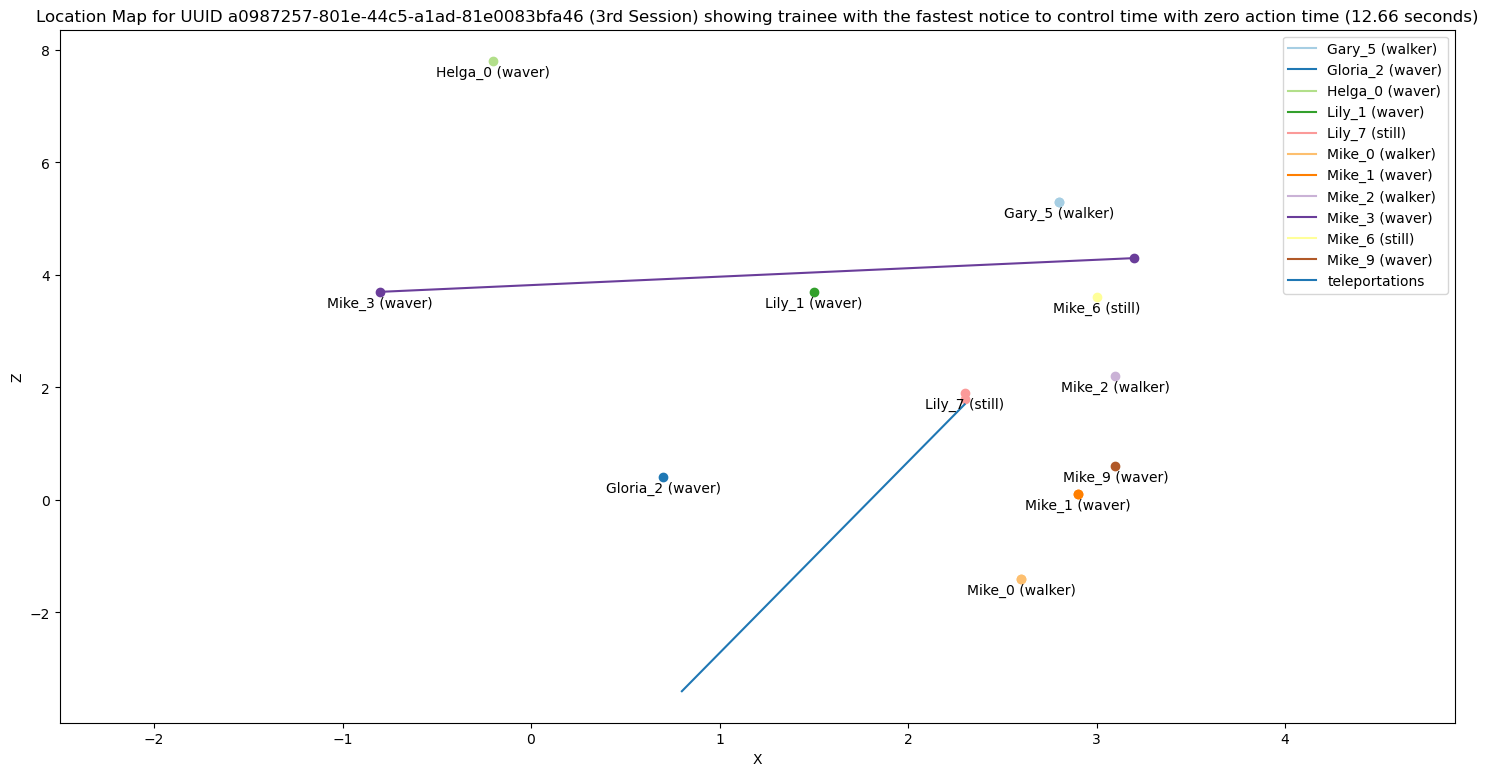

In [9]:

# Get time group with the fastest action to control time
mask_series = (notice_to_control_time_df.action_to_control_time == 0)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=True,
    title_str='fastest notice to control time with zero action time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

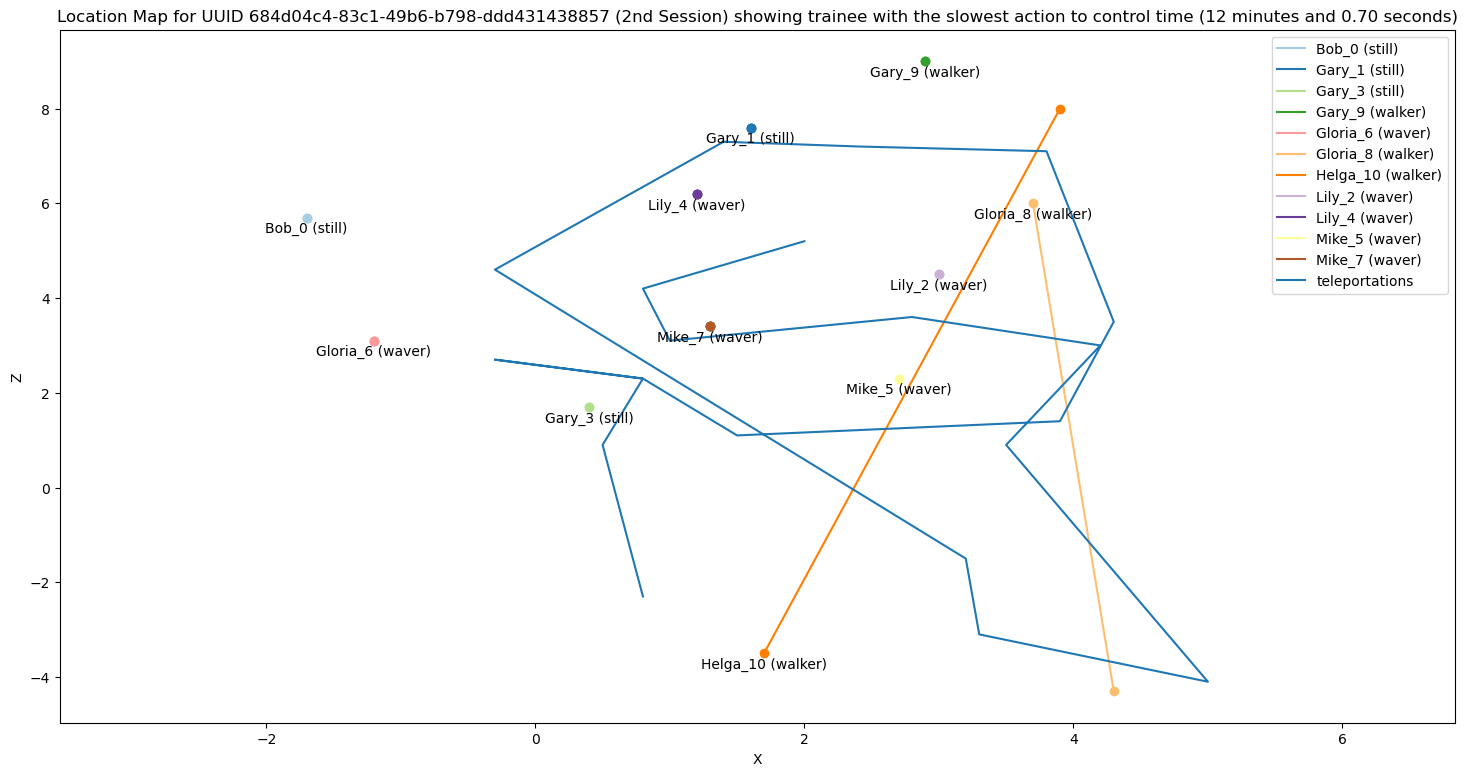

In [10]:

# Get time group with the slowest action to control time
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'action_to_control_time', mask_series=None, is_ascending=False,
    title_str='slowest action to control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

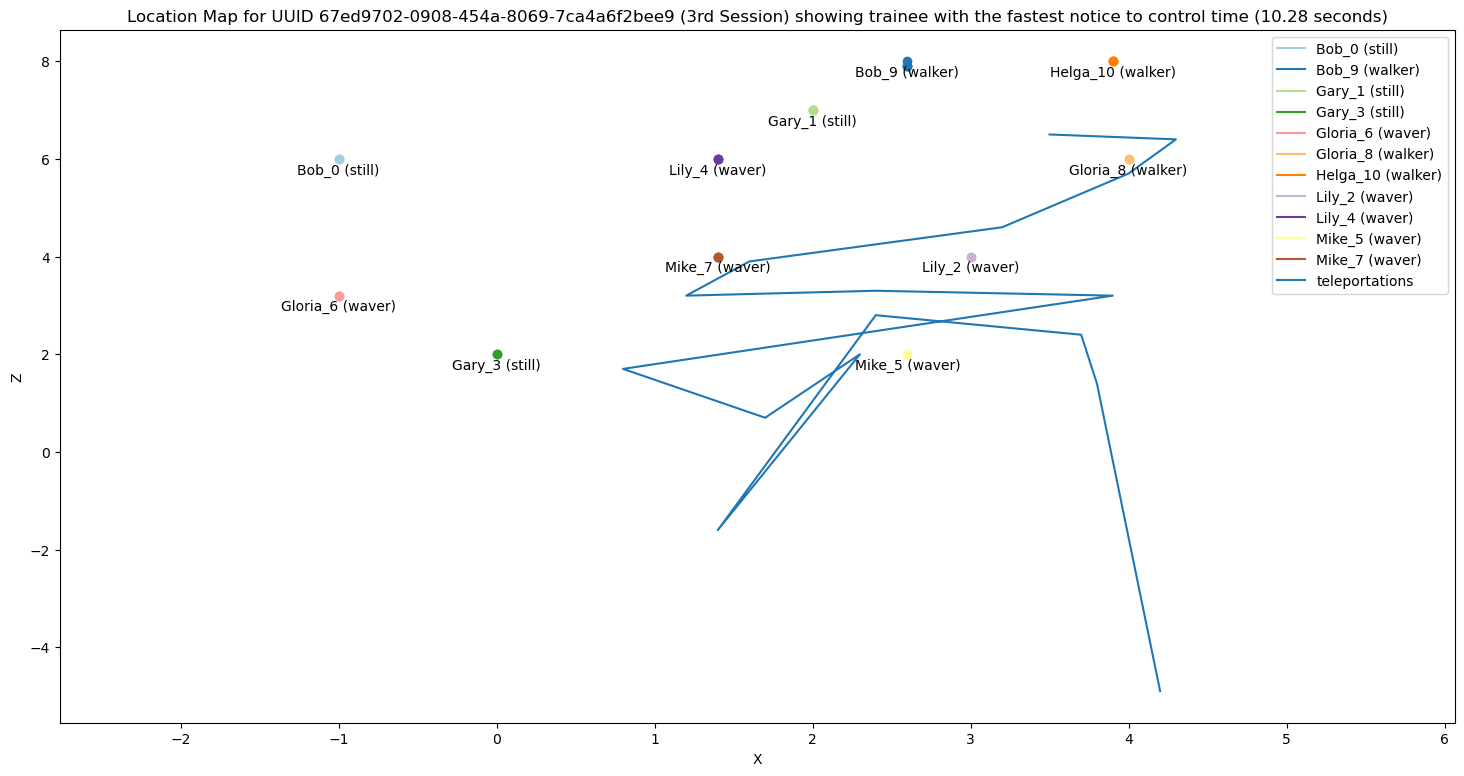

In [11]:

# Get time group with the fastest notice to control time, v1.3
mask_series = (notice_to_control_time_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=True,
    title_str='fastest notice to control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

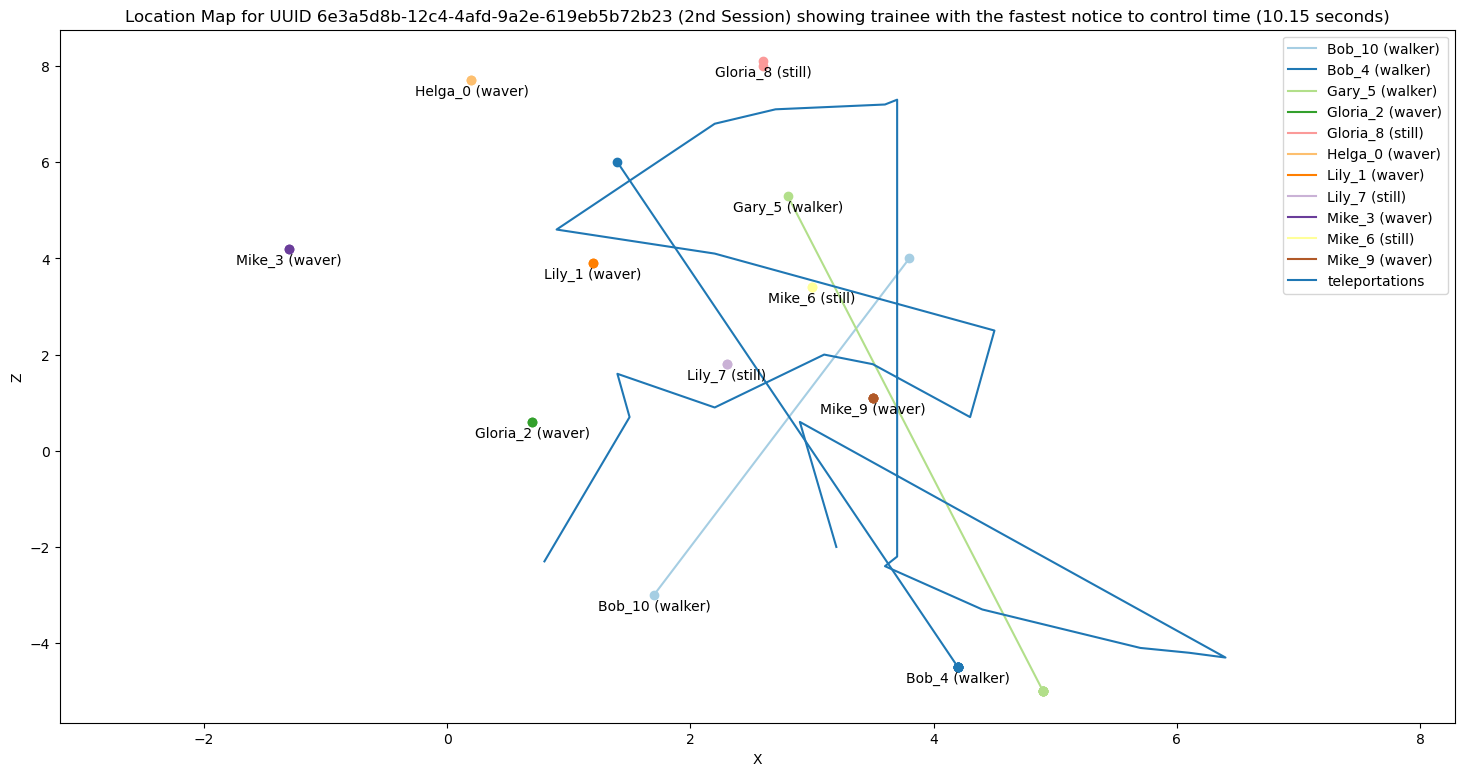

In [12]:

# Get time group with the fastest notice to control time, v1.0
mask_series = (notice_to_control_time_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=True,
    title_str='fastest notice to control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

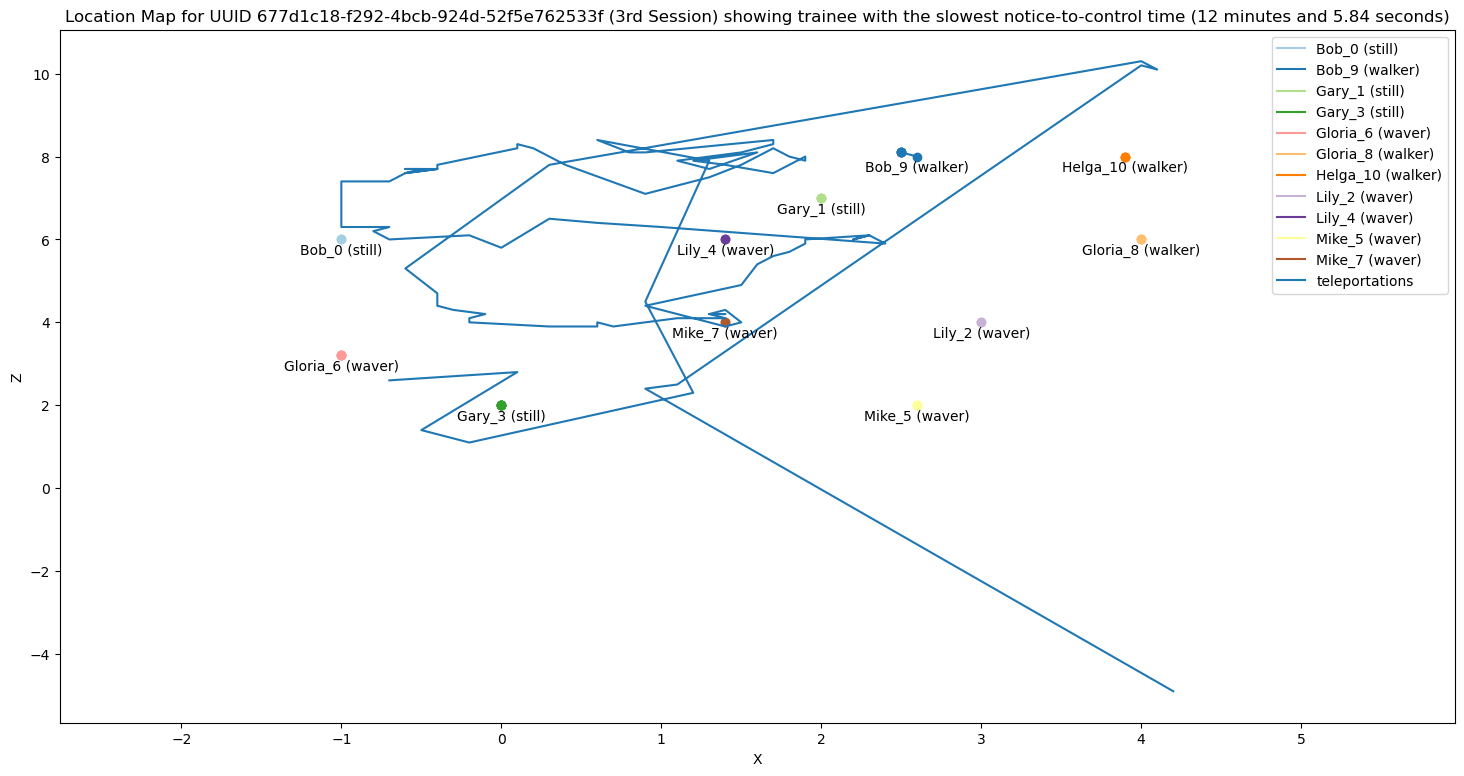

In [13]:

# Get time group with the slowest notice to control time, v1.3
mask_series = (notice_to_control_time_df.logger_version == 1.3)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=False,
    title_str='slowest notice-to-control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)

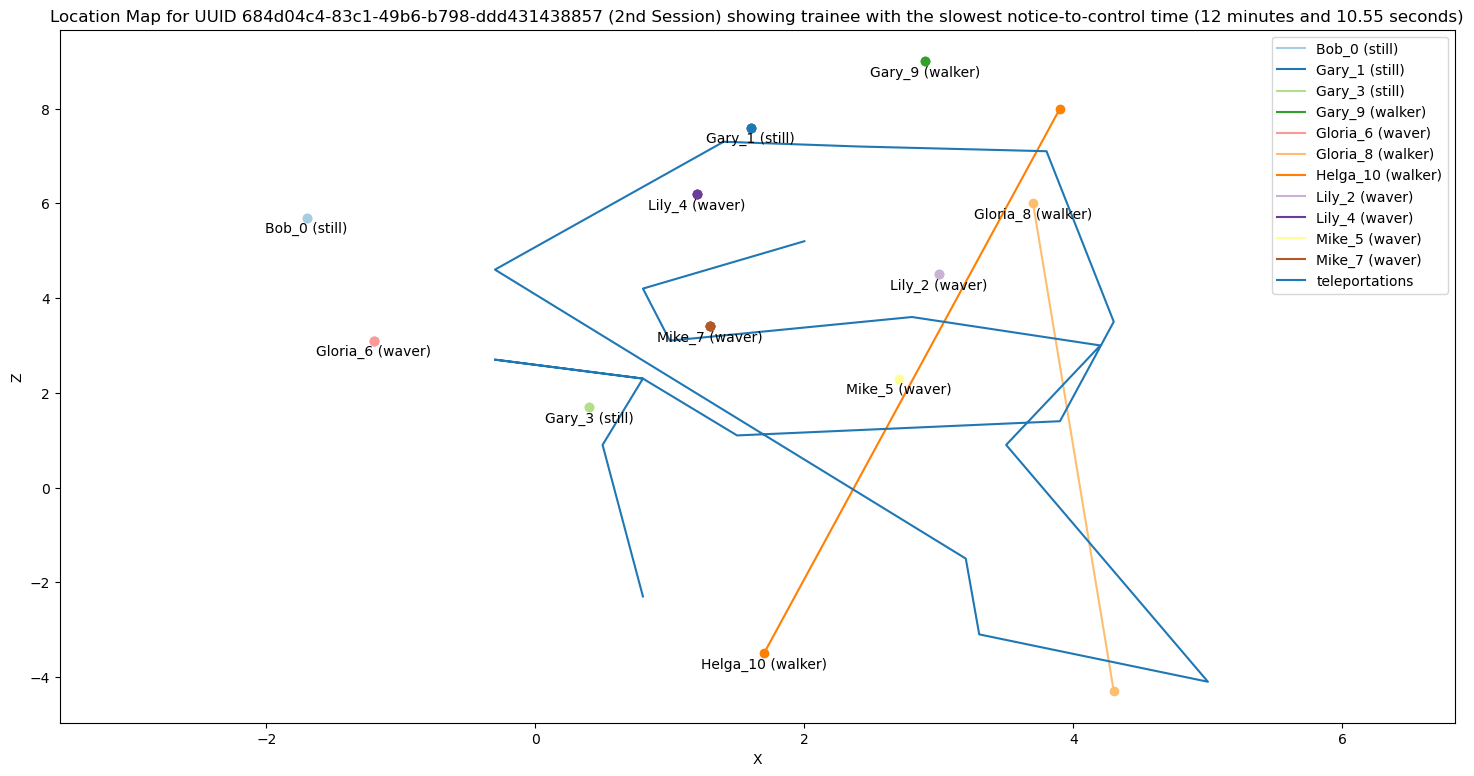

In [14]:

# Get time group with the slowest notice to control time, v1.0
mask_series = (notice_to_control_time_df.logger_version == 1.0)
nu.visualize_extreme_player_movement(
    notice_to_control_time_df, 'notice_to_control_time', mask_series=mask_series, is_ascending=False,
    title_str='slowest notice-to-control time', frvrs_logs_df=frvrs_logs_df, verbose=False
)


## Studying the misses

There are a total of 5 bleeding events that qualify as major arterial hemorrhage (Lily_2 Tourniquet, Lily_4 woundpack, Mike_5 woundpack & Tourniquet, and Mike_7 Tourniquet).

In [17]:

# Establish a definition of a missed bleeding event
df = notice_to_control_time_df.sort_values('notice_to_control_time')
missed_cutoff = df.tail(int(notice_to_control_time_df.shape[0]/10)).notice_to_control_time.min()
mask_series = (notice_to_control_time_df.notice_to_control_time < missed_cutoff)
notice_to_control_time_df[mask_series].notice_to_control_time.value_counts(bins=9)

(149890.111, 184825.889]    313
(184825.889, 219761.667]    272
(114954.333, 149890.111]    262
(219761.667, 254697.444]    240
(80018.556, 114954.333]     212
(254697.444, 289633.222]    175
(45082.778, 80018.556]      117
(289633.222, 324569.0]       98
(9832.577, 45082.778]        91
Name: notice_to_control_time, dtype: int64


Which bleeding events get missed the most (trunk, neck, junctional or extremity)?

In [24]:

# Get the trunk, neck, junctional or extremity info for each missed event
mask_series = (notice_to_control_time_df.notice_to_control_time >= missed_cutoff)
groupby_columns = ['session_uuid', 'time_group', 'patient_id']
gb = notice_to_control_time_df[mask_series].groupby(groupby_columns)
for (session_uuid, time_group, patient_id), df1 in gb:
    
    # Get the patient's entire history
    mask_series = True
    for cn in groupby_columns: mask_series &= (frvrs_logs_df[cn] == eval(cn))
    df2 = frvrs_logs_df[mask_series]

    # Check for body region info
    mask_series = ~df2.injury_record_body_region.isnull() | ~df2.injury_treated_body_region.isnull()
    if df2[mask_series].shape[0]:
        display(df2[mask_series].sample(min(4, df2[mask_series].shape[0])).dropna(axis='columns', how='all').T)
        break

,35754,35415
action_type,INJURY_TREATED,INJURY_RECORD
elapsed_time,386013,16483
event_time,2023-03-14 12:38:08,2023-03-14 12:31:58
session_uuid,00b2e9d8-c3bb-4d89-92c1-abce5c4a0655,00b2e9d8-c3bb-4d89-92c1-abce5c4a0655
file_name,All CSV files renamed by date/03.14.23.1247-40...,All CSV files renamed by date/03.14.23.1247-40...
logger_version,1.0,1.0
time_group,1,1
injury_record_id,NaN,L Shoulder Puncture
injury_record_patient_id,NaN,Mike_2 Root
injury_record_required_procedure,NaN,woundpack


In [22]:

columns_list = [
    'injury_record_id', 'injury_record_body_region', 'injury_treated_id', 'injury_treated_body_region',
    'injury_id'
]
for cn in columns_list:
    sample_list = frvrs_logs_df[cn].unique()
    if len(sample_list) < 20:
        print(cn, sample_list)

injury_record_body_region [nan 'rightArm' 'leftLeg' 'chest' 'head' 'leftArm' 'abdomen' 'rightLeg'
 'neck']
injury_treated_body_region [nan 'chest' 'leftLeg' 'rightArm' 'rightLeg' 'abdomen' 'leftArm' 'head'
 'neck']


What goes into why they were missed (patient location, patient position, patient level of consciousness, etc.)?

What activities occurred prior to completion of hemorrhage control?